# 画像メディア工学３回目
## 3. 画像を読み込み，ヒストグラムを描いてみる
### ライブラリの読み込み（おまじない）

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

## 3.1 画像の読み込みと表示
### Google colaboratoryで利用する場合

以下のコマンドを実行すると，Colabに画像がアップされます．

時間が経つと実行環境がリセットされるため，その際には再度画像ファイルのアップロードが必要．

https://github.com/yamazoe/ImageMediaProcessing/raw/main/img/img01a.png

https://github.com/yamazoe/ImageMediaProcessing/raw/main/img/img01b.png

img01a | img01b
:---: | :---:
<img src="https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01a.png" width="200px">|<img src="https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01b.png" width="200px">

In [2]:
!wget https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01a.png -O img01a.png
!wget https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01b.png -O img01b.png

--2023-10-21 05:51:02--  https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01a.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67556 (66K) [image/png]
Saving to: ‘img01a.png’

img01a.png          100%[===================>]  65.97K  --.-KB/s    in 0.02s   

2023-10-21 05:51:02 (3.06 MB/s) - ‘img01a.png’ saved [67556/67556]

--2023-10-21 05:51:02--  https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/img01b.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62783 (61K) [image/png]
Sa

### 画像の読み込み
ここでは，画像の読み込みには，OpenCVの関数``cv2.imread()``を利用する．

In [3]:
imga = cv2.imread('img01a.png', 0)  # モノクロ画像として読み込み
imgb = cv2.imread('img01b.png', 0)  # モノクロ画像として読み込み

画像の表示には，matplotlibの関数``plt.imshow()``を利用する．

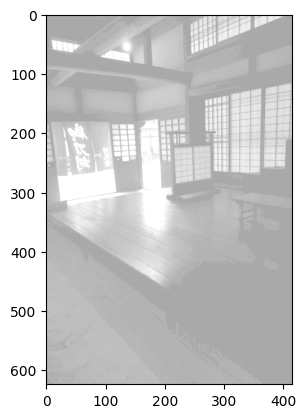

In [4]:
plt.imshow(imga, cmap='gray', vmin = 0, vmax = 255)

モノクロ画像として読み込んでいるので，画像（配列）のサイズは２次元．

numpyの配列には，``shape``というインスタンス変数があり，``.shape``とすることで，配列の形状を確認できる．

In [5]:
imga.shape

(624, 416)

OpenCVでカラー画像を読み込んだ場合には，色変換が必要（３次元配列のRGBの順番が異なるため）．

ただし，この例では元画像がグレーなので，カラーでは表示されません．

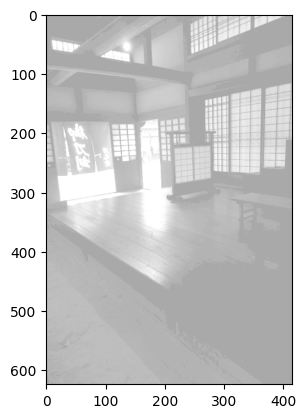

In [6]:
img_col = cv2.imread('img01a.png')  # カラー画像として読み込み
img_col = cv2.cvtColor(img_col, cv2.COLOR_BGR2RGB)
plt.imshow(img_col, vmin = 0, vmax = 255)

## 3.2 画像統計量の計算

最小値，最大値などの画像統計量は，以下のように計算できる．

```imga```の場合

In [7]:
minval = np.min(imga)      # 最小値
maxval = np.max(imga)      # 最大値
ave    = np.average(imga)  # 平均値
median = np.median(imga)   # 中央値
sd     = np.std(imga)      # 標準偏差

print( minval, maxval )   # 最小値, 最大値
print( ave, median, sd )  # 平均値, 中央値, 標準偏差

169 255
189.9418685281065 182.0 24.051828719008537


```imgb```の場合

In [8]:
minval = np.min(imgb)      # 最小値
maxval = np.max(imgb)      # 最大値
ave    = np.average(imgb)  # 平均値
median = np.median(imgb)   # 中央値
sd     = np.std(imgb)      # 標準偏差

print( minval, maxval )   # 最小値, 最大値
print( ave, median, sd )  # 平均値, 中央値, 標準偏差

34 78
44.90677391518738 41.0 12.201015669990717


## 3.3 ヒストグラムの描画
``plt.hist()``関数を用いてヒストグラムを描画できる．
ここでは，ビンの数: 25, 範囲: 0-255と設定している．

画像は２次元または３次元配列であるが，ヒストグラムを描画する際には１次元配列に変換する必要がある．

``.ravel()``を用いることで，多次元配列を1次元配列に変換できる．

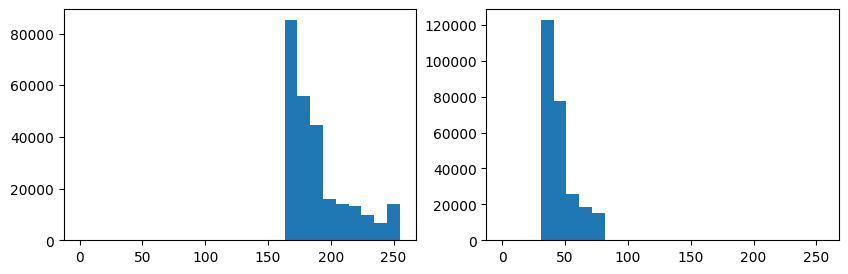

In [9]:
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.hist(imga.ravel(), bins=25, range=(0, 255));
plt.subplot(122)
plt.hist(imgb.ravel(), bins=25, range=(0, 255));

#  課題（提出必須）
画像(``img01a.png``）に対して，以下に示す折れ線型トーンカーブの処理後の画像について，最小値と最大値を回答してください．

ただし，元の画像(``img01a.png``）の最小値は169，最大値は255であり，小数点以下は切り捨てとします．

<img src="https://raw.githubusercontent.com/yamazoe/ImageMediaProcessing/main/img/tonecurve.png" width="300px">


# Python課題

1.   上に示した折れ線型トーンカーブを用いて，画像(``img01a.png``）のコントラストを上げた画像``img2``を作成してください．

2.   「3.2 画像統計量の計算」で計算した変数``minval, maxval, ave, median, sd``を利用して，コントラストを最大とする画像``img2``を作成してください．

下の``img2 = ????``の行を提出してください．

### ヒント

*   ``imga-50``とすると，画像全体の画素値が50減少します
*   ``2*imga``とすると，画像全体の画素値が2倍になります


In [10]:
# 例えば，2で割った場合
img2 = imga-50

### 以下変換の確認用
元画像と変換後画像の描画

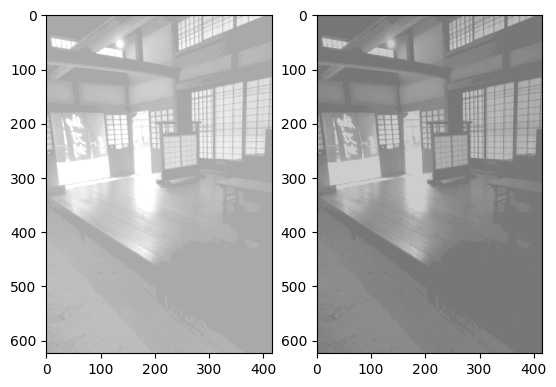

In [11]:
plt.subplot(1,2,1)
plt.imshow(imga, cmap='gray', vmin = 0, vmax = 255)

plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray', vmin = 0, vmax = 255)

変換後画像のヒストグラム

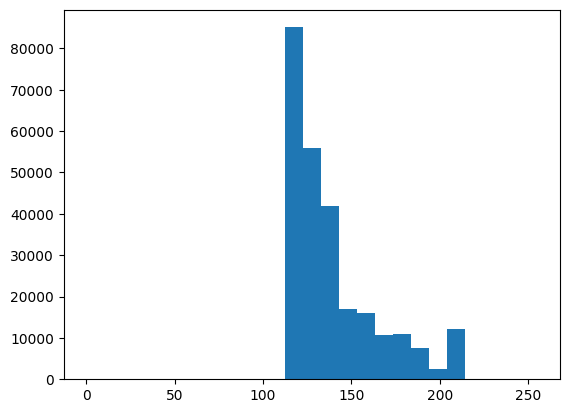

In [12]:
plt.hist(img2.ravel(), bins=25, range=(0, 255));